In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

os.chdir('c:/github/pyMIMICS_STODE')

In [2]:
df = pd.read_csv('Data/RCrk_SOC_all_raw.csv', delimiter=',')

In [3]:
from RXEQ import RXEQ
from MIMICS_stode_ftn_ts import MIMICS_TS

row = df.iloc[[0]].reset_index()
MIMout = MIMICS_TS(row, multi=False)
print(MIMout[len(MIMout)-1,:])

[0.20250366 0.97113286 0.00582021 0.01535533 0.29644523 1.09936811
 0.73729047]


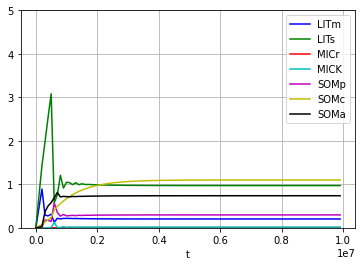

In [4]:
    t = np.arange(1, 1e07, 100000) 

    plt.plot(t, MIMout[:, 0], 'b', label='LITm')
    plt.plot(t, MIMout[:, 1], 'g', label='LITs')
    plt.plot(t, MIMout[:, 2], 'r', label='MICr')
    plt.plot(t, MIMout[:, 3], 'c', label='MICK')
    plt.plot(t, MIMout[:, 4], 'm', label='SOMp')
    plt.plot(t, MIMout[:, 5], 'y', label='SOMc')
    plt.plot(t, MIMout[:, 6], 'k', label='SOMa')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.ylim([0, 5])
    plt.grid()
    plt.show()

In [5]:
from MIMICS_stode_ftn_ss import MIMICS_SS

start_time = time.time()

MIMout_set = df.apply(lambda row: MIMICS_SS(row, multi=True), axis=1)

print("--- %s seconds ---" % (time.time() - start_time)) 
print(MIMout_set)

# Output key:
# LITm, LITs, MICr, MICK, SOMp, SOMc, SOMa

# Requires ~21 sec on laptop to run all 335 RCrk sites

--- 20.396671772003174 seconds ---
0      [0.21213158748436461, 0.916704585628417, 0.005...
1      [0.24720795321611114, 1.1811974607804834, 0.03...
2      [0.2499500103678727, 1.1880723626629928, 0.033...
3      [0.25351104240544065, 1.1998998959813665, 0.03...
4      [0.26467434383144955, 1.240173385953109, 0.038...
                             ...                        
331    [0.7467968218198565, 3.1540476540170372, 0.013...
332    [0.7433026079651274, 3.140970557605273, 0.0104...
333    [0.6987636234199037, 3.057491017674336, 0.0053...
334    [0.8497316982531327, 3.4770897302254693, 0.014...
335    [0.8968740536250369, 3.6084102697181843, 0.011...
Length: 336, dtype: object
